# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 590


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | dudinka
Processing Record 3 of Set 1 | yigo village
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | kampong chhnang
Processing Record 6 of Set 1 | papatowai
Processing Record 7 of Set 1 | isafjordur
Processing Record 8 of Set 1 | keflavik
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | bethel
Processing Record 11 of Set 1 | badger
Processing Record 12 of Set 1 | hawaiian paradise park
Processing Record 13 of Set 1 | grytviken
Processing Record 14 of Set 1 | nar'yan-mar
Processing Record 15 of Set 1 | lautoka
Processing Record 16 of Set 1 | talnakh
Processing Record 17 of Set 1 | zeya
Processing Record 18 of Set 1 | punta del este
Processing Record 19 of Set 1 | codajas
Processing Record 20 of Set 1 | saint-louis
Processing Record 21 of Set 1 | ilulissat
Processing Record 22 of Set 1 | puerto ayora
Pro

Processing Record 39 of Set 4 | gebeit
Processing Record 40 of Set 4 | kerikeri
Processing Record 41 of Set 4 | taltal
Processing Record 42 of Set 4 | miles city
Processing Record 43 of Set 4 | chagoda
Processing Record 44 of Set 4 | nahiyat ash shinafiyah
Processing Record 45 of Set 4 | vilyuchinsk
Processing Record 46 of Set 4 | usogorsk
Processing Record 47 of Set 4 | ulladulla
Processing Record 48 of Set 4 | whitehorse
Processing Record 49 of Set 4 | epe
Processing Record 0 of Set 5 | revda
Processing Record 1 of Set 5 | rikaze
Processing Record 2 of Set 5 | zangguy
City not found. Skipping...
Processing Record 3 of Set 5 | enewetak
Processing Record 4 of Set 5 | rouissat
Processing Record 5 of Set 5 | maitum
Processing Record 6 of Set 5 | savanna-la-mar
Processing Record 7 of Set 5 | bhanvad
Processing Record 8 of Set 5 | luderitz
Processing Record 9 of Set 5 | palikir - national government center
Processing Record 10 of Set 5 | kingston
Processing Record 11 of Set 5 | manggar
Pro

Processing Record 30 of Set 8 | pacific grove
Processing Record 31 of Set 8 | burang
Processing Record 32 of Set 8 | thaton
Processing Record 33 of Set 8 | orapa
Processing Record 34 of Set 8 | kutum
Processing Record 35 of Set 8 | san rafael
Processing Record 36 of Set 8 | kachug
Processing Record 37 of Set 8 | tobruk
Processing Record 38 of Set 8 | juneau
Processing Record 39 of Set 8 | ilhabela
Processing Record 40 of Set 8 | elk grove
Processing Record 41 of Set 8 | bath
Processing Record 42 of Set 8 | nicoya
Processing Record 43 of Set 8 | srandakan
Processing Record 44 of Set 8 | toga village
City not found. Skipping...
Processing Record 45 of Set 8 | cole harbour
Processing Record 46 of Set 8 | pagouda
Processing Record 47 of Set 8 | antofagasta
Processing Record 48 of Set 8 | minas de marcona
Processing Record 49 of Set 8 | puerto madero
Processing Record 0 of Set 9 | dwarka
Processing Record 1 of Set 9 | acapulco de juarez
Processing Record 2 of Set 9 | les cayes
Processing Re

Processing Record 20 of Set 12 | lata
Processing Record 21 of Set 12 | gallatin
Processing Record 22 of Set 12 | mugia
Processing Record 23 of Set 12 | peniche
Processing Record 24 of Set 12 | chahuites
Processing Record 25 of Set 12 | prainha
Processing Record 26 of Set 12 | varberg
Processing Record 27 of Set 12 | dubbo
Processing Record 28 of Set 12 | langepas
Processing Record 29 of Set 12 | villa bruzual
Processing Record 30 of Set 12 | churachandpur
Processing Record 31 of Set 12 | douz
Processing Record 32 of Set 12 | tabas
Processing Record 33 of Set 12 | girvan
Processing Record 34 of Set 12 | ar ruways
Processing Record 35 of Set 12 | castillos
Processing Record 36 of Set 12 | vilcun
Processing Record 37 of Set 12 | kirensk
Processing Record 38 of Set 12 | kyzyl-suu
Processing Record 39 of Set 12 | kampung sungai ara
-----------------------------
Data Retrieval Complete      
-----------------------------


In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,279.94,91,100,11.08,TF,1683793264
1,dudinka,69.4058,86.1778,261.83,87,22,6.61,RU,1683793264
2,yigo village,13.5361,144.8886,301.89,82,75,4.63,GU,1683793265
3,waitangi,-43.9535,-176.5597,283.05,89,98,0.89,NZ,1683793265
4,kampong chhnang,12.1667,104.5500,308.78,42,77,1.28,KH,1683793266


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,279.94,91,100,11.08,TF,1683793264
1,dudinka,69.4058,86.1778,261.83,87,22,6.61,RU,1683793264
2,yigo village,13.5361,144.8886,301.89,82,75,4.63,GU,1683793265
3,waitangi,-43.9535,-176.5597,283.05,89,98,0.89,NZ,1683793265
4,kampong chhnang,12.1667,104.5500,308.78,42,77,1.28,KH,1683793266


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

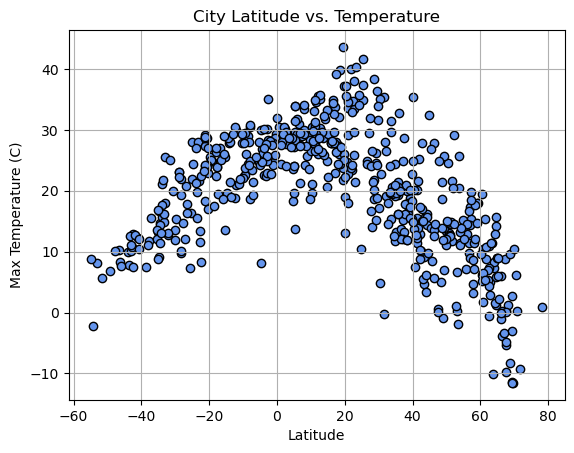

In [60]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'] - 273.15, color = "cornflowerblue", edgecolors = "black")
plt.title('City Latitude vs. Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')

# Incorporate the other graph properties
plt.grid()

# Save the figure
#plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

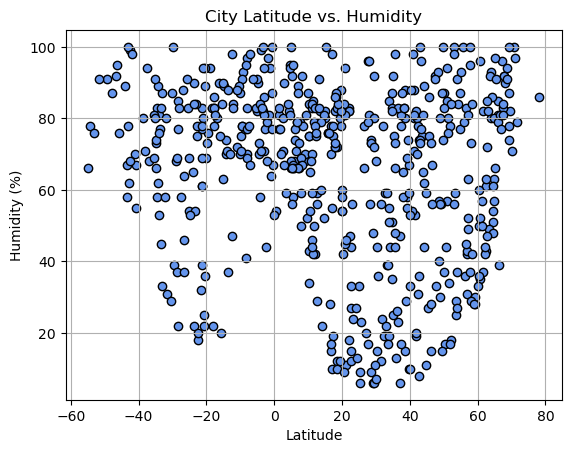

In [61]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], color = "cornflowerblue", edgecolors = "black")
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Incorporate the other graph properties
plt.grid()

# Save the figure
#plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

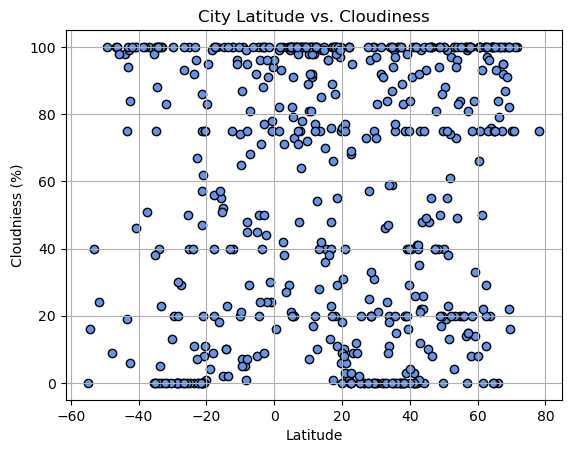

In [63]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], color = "cornflowerblue", edgecolors = "black")
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudniess (%)')
# Incorporate the other graph properties
plt.grid()

# Save the figure
#plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

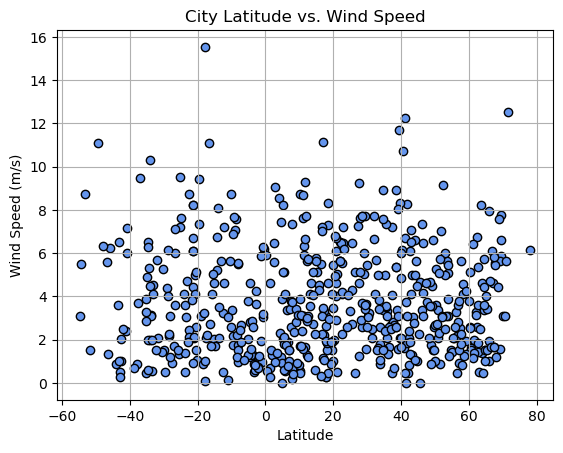

In [64]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], color = "cornflowerblue", edgecolors = "black")
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

# Incorporate the other graph properties
plt.grid()

# Save the figure
#plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [86]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x, y, x_label, y_label):
    # Compute the linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    
    # Compute the regression line
    regress_values = x * slope + intercept
    
    # Create a scatter plot of the data
    plt.scatter(x, y, color = "cornflowerblue", edgecolor = "black")
    
    # Plot the regression line
    plt.plot(x, regress_values, "r-")
    
    # Annotate the plot with the equation of the line
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    plt.annotate(line_eq, (min(x), min(y)), fontsize=15, color="red")
    
    # Add axis labels
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    # Show the plot
    plt.show()

In [87]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,dudinka,69.4058,86.1778,261.83,87,22,6.61,RU,1683793264
2,yigo village,13.5361,144.8886,301.89,82,75,4.63,GU,1683793265
4,kampong chhnang,12.1667,104.5500,308.78,42,77,1.28,KH,1683793266
6,isafjordur,66.0755,-23.1240,279.17,81,0,1.03,IS,1683793267
7,keflavik,64.0049,-22.5624,280.39,93,100,4.63,IS,1683793268


In [88]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,279.94,91,100,11.08,TF,1683793264
3,waitangi,-43.9535,-176.5597,283.05,89,98,0.89,NZ,1683793265
5,papatowai,-46.5619,169.4708,283.50,92,100,5.59,NZ,1683793266
8,adamstown,-25.0660,-130.1015,295.02,54,100,9.52,PN,1683793268
12,grytviken,-54.2811,-36.5092,270.93,78,16,5.51,GS,1683793271


###  Temperature vs. Latitude Linear Regression Plot

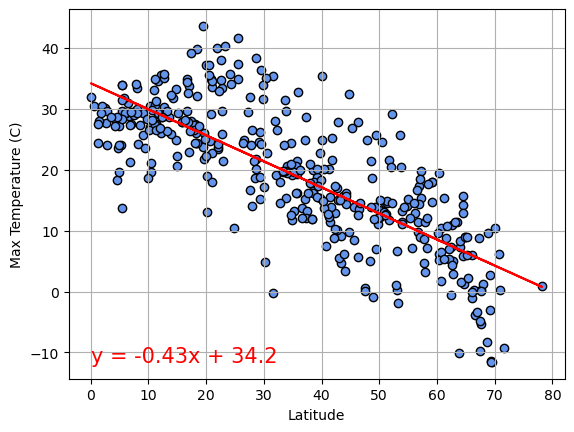

In [89]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp'] - 273.15
x_label = 'Latitude'
y_label = 'Max Temperature (C)'
plt.grid()
plot_linear_regression(x, y, x_label, y_label)


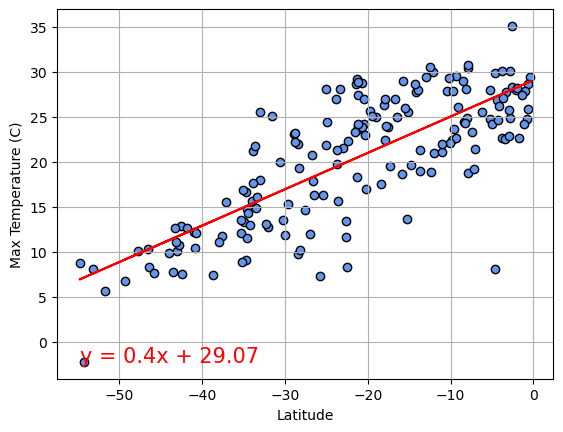

In [90]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp'] - 273.15
x_label = 'Latitude'
y_label = 'Max Temperature (C)'
plt.grid()
plot_linear_regression(x, y, x_label, y_label)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

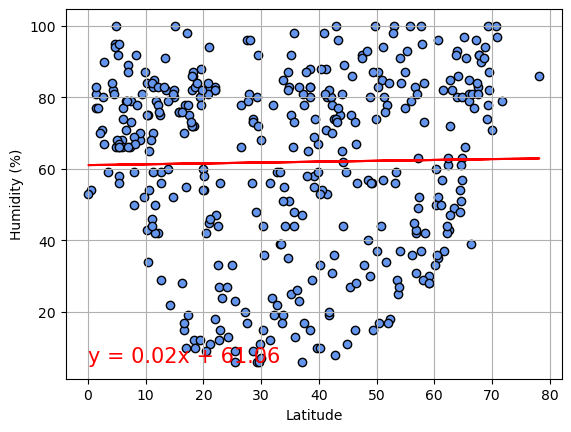

In [91]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Humidity']
x_label = 'Latitude'
y_label = 'Humidity (%)'
plt.grid()
plot_linear_regression(x, y, x_label, y_label)

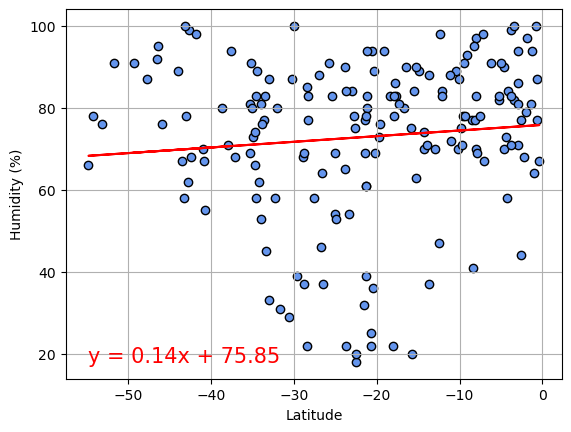

In [92]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity']
x_label = 'Latitude'
y_label = 'Humidity (%)'
plt.grid()
plot_linear_regression(x, y, x_label, y_label)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

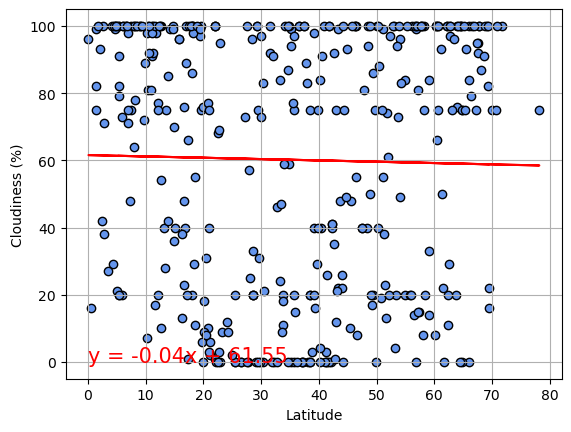

In [93]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Cloudiness']
x_label = 'Latitude'
y_label = 'Cloudiness (%)'
plt.grid()
plot_linear_regression(x, y, x_label, y_label)

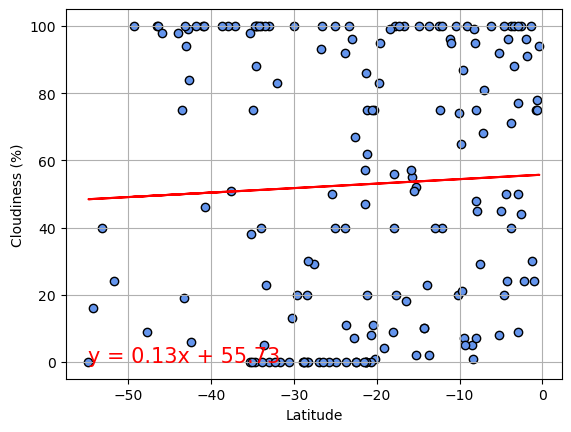

In [94]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Cloudiness']
x_label = 'Latitude'
y_label = 'Cloudiness (%)'
plt.grid()
plot_linear_regression(x, y, x_label, y_label)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

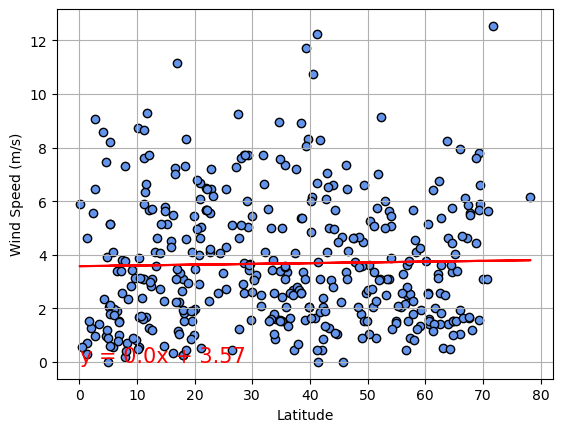

In [95]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Wind Speed']
x_label = 'Latitude'
y_label = 'Wind Speed (m/s)'
plt.grid()
plot_linear_regression(x, y, x_label, y_label)

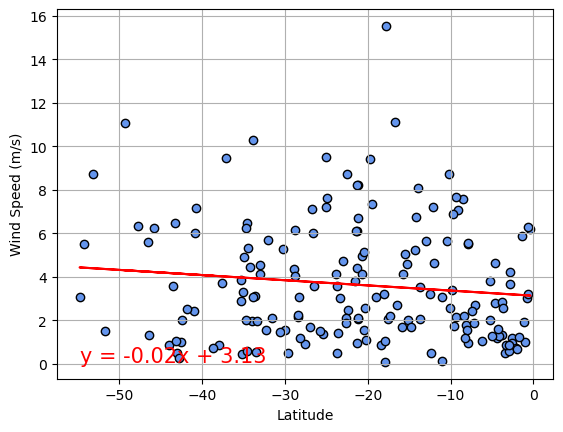

In [96]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Wind Speed']
x_label = 'Latitude'
y_label = 'Wind Speed (m/s)'
plt.grid()
plot_linear_regression(x, y, x_label, y_label)

**Discussion about the linear relationship:** YOUR RESPONSE HERE